In [43]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import math
from matplotlib import style
style.use('dark_background')
# style.use('bmh')

In [40]:
def dirac_notation(coefficients, num_qubits):
    print(coefficients[0], '|', bin(0).replace("0b", "").zfill(num_qubits), '>' , sep = '', end = ' ')
    for i in range(1, int(math.pow(2, num_qubits))):
        print('+\n', coefficients[i], '|', bin(i).replace("0b", "").zfill(num_qubits), '>' , sep = '', end = ' ')

In [3]:
def init(qubits, value, qc):
    n = len(qubits)
    for i in range(n):
        if value[i]=='1':
            qc.x(qubits[i])
    return qc

In [4]:
def makeQFT(qc):
    n = qc.num_qubits
    for i in range(n-1, -1, -1):
        qc.h(i)
        for j in range(i):
            qc.cu1(np.pi/math.pow(2, i-j), i, j)
    for i in range(n//2):
        qc.swap(i, n-i-1)
    return qc

Z basis


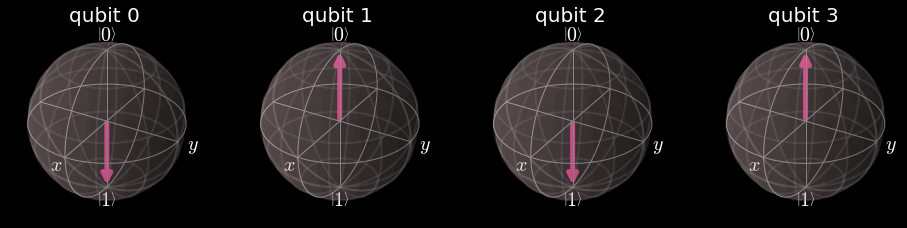

X basis (after QFT)


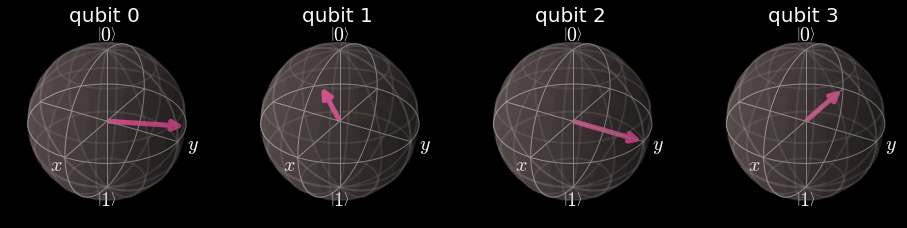


(0.25-0j)|0000> +
(-0.1+0.23j)|0001> +
(-0.18-0.18j)|0010> +
(0.23-0.1j)|0011> +
0.25j|0100> +
(-0.23-0.1j)|0101> +
(0.18-0.18j)|0110> +
(0.1+0.23j)|0111> +
(-0.25+0j)|1000> +
(0.1-0.23j)|1001> +
(0.18+0.18j)|1010> +
(-0.23+0.1j)|1011> +
(-0-0.25j)|1100> +
(0.23+0.1j)|1101> +
(-0.18+0.18j)|1110> +
(-0.1-0.23j)|1111> 

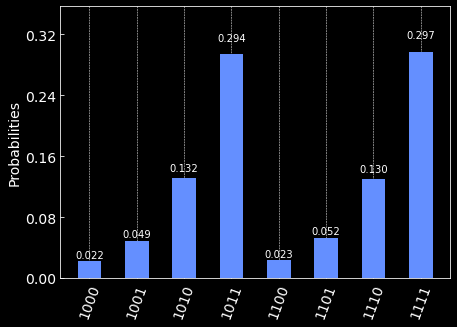

In [44]:
n = 4
inp = '0101'
# for i in range(16):
# inp = "{0:4b}".format(i)
qc = QuantumCircuit(n)
qc_init = QuantumCircuit(n)
qc = init([3,2,1,0], inp, qc)
qc_init = init([3,2,1,0], inp, qc_init)
qc = makeQFT(qc)

# display(qc.draw('mpl'))
# display(qc_init.draw('mpl'))
sim = Aer.get_backend('statevector_simulator')
result = execute(qc, sim, shots = 1).result()
result_init = execute(qc_init, sim, shots = 1).result()
print("Z basis")
display(plot_bloch_multivector(result_init.get_statevector()))
print("X basis (after QFT)")
display(plot_bloch_multivector(result.get_statevector()))
print()

# print("statevector: ", result.get_statevector())
dirac_notation(np.around(result.get_statevector(), 2), 4)
qc.h(range(n))
qc.measure_all()
result = execute(qc, Aer.get_backend('qasm_simulator'), shots = 100000).result()
plot_histogram(result.get_counts())